<a href="https://colab.research.google.com/github/CHRISTINEMUTHEE/MachineLearning/blob/main/Moringa_Data_Science_Core__Module_2_Independent_Project_2021_10_Christine_Muthee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Football Analysis- Mchezopesa Ltd.


## 1. Defining the Question

#### The objective is to predict the result of a game between two teams based on who is home and who is away and also based on the tournament type

### a.) Specifying the question

#### What are the possible results of a game between two teams ?

### b.) Defining the Metric for success

#### a.) My success criteria will be predicting the outcome of a game between to teams.
#### b.) Creating a model that predicts how many goals the home team scores
#### c.) Creating a model that predicts how many goals the away team scores
#### d.) Figure out from a home teams perspective whether the outcome is a win,loss or a draw

### c.) Recording the Experimental Design

#### This analysis will involve mainly analysing my dataset to see its fitness for modelling and performing the modelling using two approaches:
*   Polynomial approach:This will be used to predict how many goals the home team scores and also how many goals the away team scores.
*   Logistic approach: This will be used to figure out the outcome of a game from the home teams perspective.



### d.) Data Relevance

#### Details about the teams including the history of games the ranks will be relevant in carrying out my analysis ...

## 2.) Reading the data

In [272]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
#Reading the dataset
def Datasets(data):
  df=pd.read_csv(data,parse_dates=True)
  return df

In [274]:
#Loading the Fifa ranking dataset
fifa_df=Datasets('fifa_ranking.csv')
fifa_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [275]:
#Loading the results dataset
results_df=Datasets('results.csv')
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 3. Checking the data

In [276]:
# Defining a function to check details about the data
def Datacheck(data):
  head=data.head()
  tail=data.tail()
  types=data.dtypes
  print(head,'\n',tail,'\n',types)

#### 1.) Fifa Ranking

In [277]:
# Rows and columns
print('The Fifa ranking dataset has: ',fifa_df.shape[0],'Rows and ',fifa_df.shape[1],'Columns')

The Fifa ranking dataset has:  57793 Rows and  16 Columns


In [278]:
#Head and Tail
fifa_df.head()
fifa_df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [279]:
# Checking for datatypes
fifa_df.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

#### 2.) Results dataset

In [280]:
# Checking the number of rows and columns in my dataset
print('The Fifa ranking dataset has: ',results_df.shape[0],'Rows and ',results_df.shape[1],'Columns')

The Fifa ranking dataset has:  40839 Rows and  9 Columns


In [281]:
# The top and bottom of my dataset
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [282]:
results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [283]:
# Checking for datatypes
results_df.dtypes
# The ranking date is still an object type

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## 4.External Data Source Validation

### a.) Validation

In [284]:
# Using the fifa ranking dataset from an external souce(1992 to 2021),
# i can verify that the data provided is true as the country rankings are similar and the format of recording is sound
ext_df=Datasets('fifa_ranking_2021.csv')
ext_df.head()

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,43818,82,Iraq,IRQ,15,0,0,AFC,1992-12-31
1,43873,107,Mozambique,MOZ,9,0,0,CAF,1992-12-31
2,43816,108,Indonesia,IDN,9,0,0,AFC,1992-12-31
3,1882218,109,Antigua and Barbuda,ATG,8,0,0,CONCACAF,1992-12-31
4,43820,110,Jordan,JOR,8,0,0,AFC,1992-12-31


## 5.Tidying the Dataset

In [285]:
fifa_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


#### 1.) Fifa ranking dataset

In [286]:
# Dropping unnesessary columns for my analysis to reduce ambiquity
fifa_df.head()
fifa_ranking=fifa_df.drop(fifa_df.iloc[:,4:15].columns,axis=1)
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,rank_date
0,1,Germany,GER,0.0,1993-08-08
1,2,Italy,ITA,0.0,1993-08-08
2,3,Switzerland,SUI,0.0,1993-08-08
3,4,Sweden,SWE,0.0,1993-08-08
4,5,Argentina,ARG,0.0,1993-08-08


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 147 168 169 170 171 172 173 174 176 175 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 207 206 208 209]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


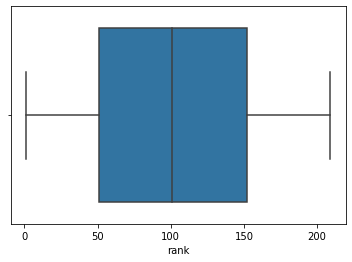

In [287]:
# Checking for outliers 
print(fifa_ranking['rank'].unique())
sns.boxplot(fifa_ranking['rank'])
# There are no outliers or here

In [288]:
countries=fifa_ranking['country_full'].unique()
len(countries)
# There are 216 countries in the datadrame

216

#### 2. Missing values

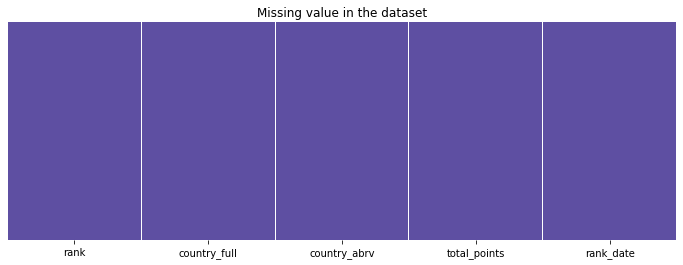

In [289]:
plt.figure(figsize=(12,4))
sns.heatmap(fifa_ranking.isnull(),cbar=False,cmap='Spectral_r',yticklabels=False)
plt.title('Missing value in the dataset');
# There are no missing values in out dataset.

In [290]:
# Duplicated
fifa_ranking.duplicated().sum()
# Dropping the duplicated values
fifa_ranking.drop_duplicates(inplace=True)

In [291]:
fifa_ranking.duplicated().sum()

0

In [292]:
# Further data cleaning proceedures.
fifa_ranking.dtypes
# Converting the date column to datetype
fifa_ranking['rank_date']=pd.to_datetime(fifa_ranking['rank_date'])
# Confirming the operation
fifa_ranking.dtypes

rank                     int64
country_full            object
country_abrv            object
total_points           float64
rank_date       datetime64[ns]
dtype: object

#### 2.) Results dataset

#### a.) Outliers

In [293]:
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [294]:
#Dropping unnecessary column
results_df1=results_df.drop(columns=['city','neutral'])

In [295]:
# Checking for value count within the country columns
pd.DataFrame(results_df1['country'].value_counts())


,country
United States,1144
France,801
England,687
Malaysia,644
Sweden,637
...,...
Lautoka,1
Micronesia,1
Portuguese Guinea,1
Mali Federation,1


In [296]:
# Checking for value count within the country columns
pd.DataFrame(results_df1['tournament'].value_counts())

,tournament
Friendly,16911
FIFA World Cup qualification,7100
UEFA Euro qualification,2432
African Cup of Nations qualification,1616
FIFA World Cup,900
...,...
Dragon Cup,4
World Unity Cup,4
Copa América qualification,2
AFF Championship qualification,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


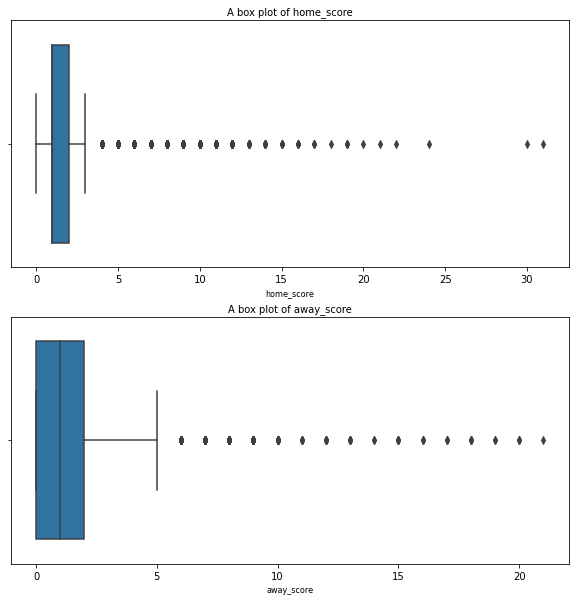

In [297]:
# Checking for outliers in the home and away scores
col_names=['home_score','away_score']
fig,ax=plt.subplots(len(col_names),figsize=(10,10))
# 
for i, col_vals in enumerate(col_names):
  sns.boxplot(results_df1[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of'+' '+col_vals,fontsize=10)
  ax[i].set_xlabel(col_vals,fontsize=8)
plt.show()
# This warrants a deeper look at the distribution of the score to determine whether to get rid of the outliers or to treat them as legitimate scores.

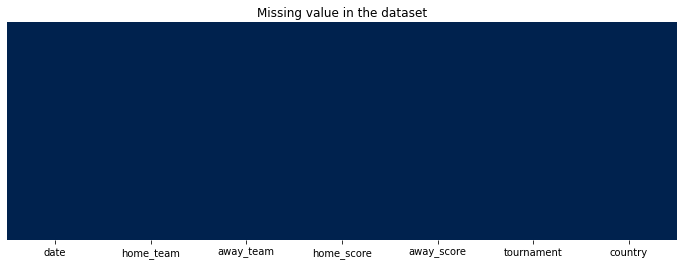

In [298]:
# Missing values
plt.figure(figsize=(12,4))
sns.heatmap(results_df1.isnull(),cbar=False,cmap='cividis',yticklabels=False)
plt.title('Missing value in the dataset');
# There are no missing values in our dataset.

In [299]:
# Checking for duplicates
results_df1.duplicated().sum()
results_df1.drop_duplicates(inplace=True)
results_df1.duplicated().sum()
# No duplicated values present

0

In [300]:
# Further data cleaning proceedures.
results_df1.dtypes
# Converting the date column to datetype
results_df1['date']=pd.to_datetime(results_df1['date'])
# Confirming the operation
results_df1.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
country               object
dtype: object

## 6.Exploratory data Analysis

In [301]:
#Merging the two datasets
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,rank_date
0,1,Germany,GER,0.0,1993-08-08
1,2,Italy,ITA,0.0,1993-08-08
2,3,Switzerland,SUI,0.0,1993-08-08
3,4,Sweden,SWE,0.0,1993-08-08
4,5,Argentina,ARG,0.0,1993-08-08


In [302]:
#results
results_df1.tail()

,date,home_team,away_team,home_score,away_score,tournament,country
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Samoa


### a.) Univariate analysis

#### 1. Fifa Ranking dataset

In [303]:
#Measures of central tendancy
fifa_ranking.describe()

,rank,total_points
count,57755.000000,57755.000000
mean,101.617938,121.973263
std,58.635588,260.480951
min,1.000000,0.000000
25%,51.000000,0.000000
50%,101.000000,0.000000
75%,152.000000,91.500000
max,209.000000,1775.030000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Distribution of ranks')

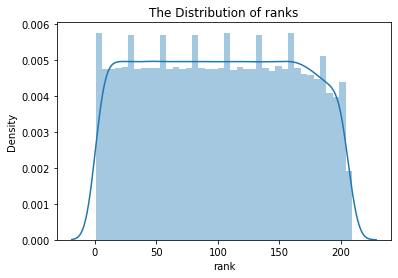

In [304]:
# Checking its the distribution of ranks within the dataset
sns.distplot(fifa_ranking['rank'],kde=True)
plt.title('The Distribution of ranks')
# It is normaly distributed with an anomaly at approximately rank 100,very few countries,teams were within the rank
# The distribution also sheds light on the discretness of the data and no outliers present

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Distribution of points')

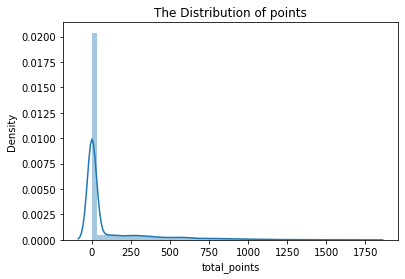

In [305]:
# Distribution of points across teams
sns.distplot(fifa_ranking['total_points'],kde=True)
plt.title('The Distribution of points')
# The distribution is not normal and the skewness tells us that most teams had zero points and the nature of points is to increase exponentially thus outliers could not be removed.

#### 2. Results dataset

In [306]:
results_df1.head()

,date,home_team,away_team,home_score,away_score,tournament,country
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,England
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,England
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland


In [307]:
# Description of numerical columns
results_df1.describe()

,home_score,away_score
count,40838.000000,40838.000000
mean,1.745703,1.188134
std,1.749166,1.405125
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


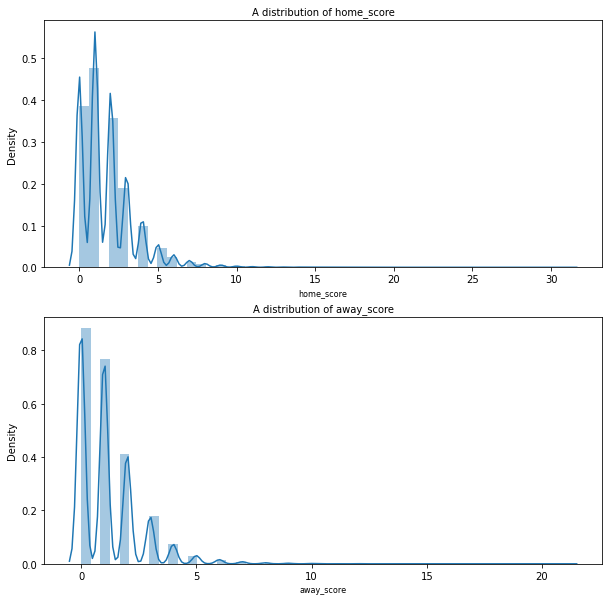

In [308]:
# Viewing the distribution of the home and away scores
col_names=['home_score','away_score']
fig,ax=plt.subplots(len(col_names),figsize=(10,10))

for i, col_vals in enumerate(col_names):
  sns.distplot(results_df1[col_vals],ax=ax[i],hist=True,kde=True)
  ax[i].set_title('A distribution of'+' '+col_vals,fontsize=10)
  ax[i].set_xlabel(col_vals,fontsize=8)
plt.show()
# The distribution is multimodal.This indicates alot of points appear highly several times.
# This can be attrubuted to its discrete nature.
# Its also skewed positively indicating that most scores were close to zero.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

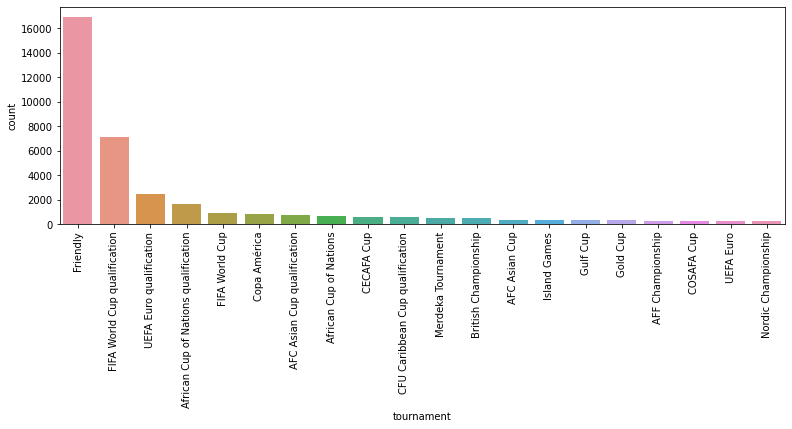

In [309]:
# A plot of the top 20 tournaments in value counts
plt.figure(figsize=(13,4))
sns.countplot(results_df1['tournament'].dropna(),
              order=results_df1['tournament'].value_counts().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
# Friendly matches were mostly played

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

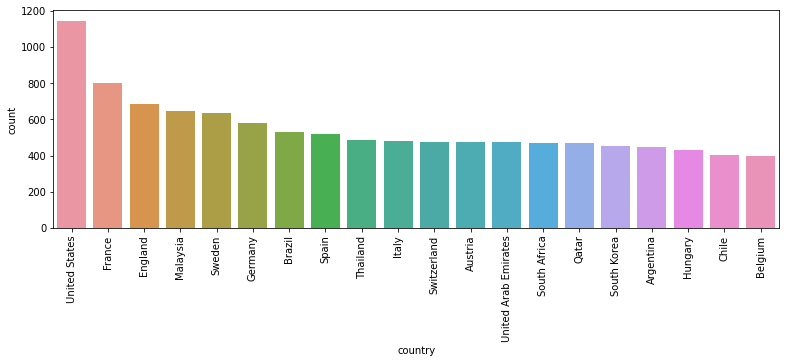

In [310]:
# Constructing plots of the 20 top most countries in value counts
plt.figure(figsize=(13,4))
sns.countplot(results_df1['country'].dropna(),
              order=results_df1['country'].value_counts().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
# United states played the most matches

### b.) Bivariate analysis

#### It is safe to note that merging the datasets was computationaly tasking this the analysis was done using separate datasets.

#### 1. Fifa ranking table

In [311]:
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,rank_date
0,1,Germany,GER,0.0,1993-08-08
1,2,Italy,ITA,0.0,1993-08-08
2,3,Switzerland,SUI,0.0,1993-08-08
3,4,Sweden,SWE,0.0,1993-08-08
4,5,Argentina,ARG,0.0,1993-08-08


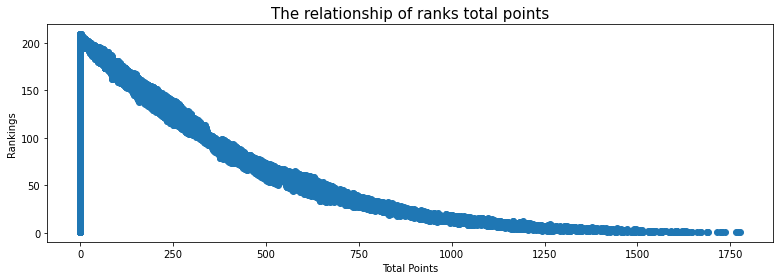

In [312]:
# checking the relationship between the ranks and total points
plt.figure(figsize=(13,4))
plt.scatter(fifa_ranking['total_points'],fifa_ranking['rank'])
plt.title('The relationship of ranks total points',fontsize=15)
plt.xlabel('Total Points')
plt.ylabel('Rankings')
plt.show()
# At the begining of the tournaments, all teams have their points as zero.
# A points accumilate with numerous games being played the teams move 'UP the rank thus the distribution of then points.

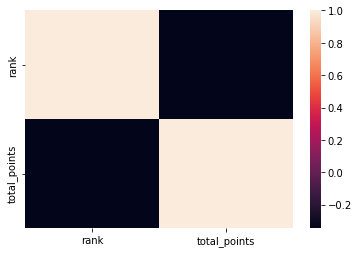

In [313]:
# Checking the corelation within the dataset.
Corr=fifa_ranking.corr()
Corr
sns.heatmap(Corr)

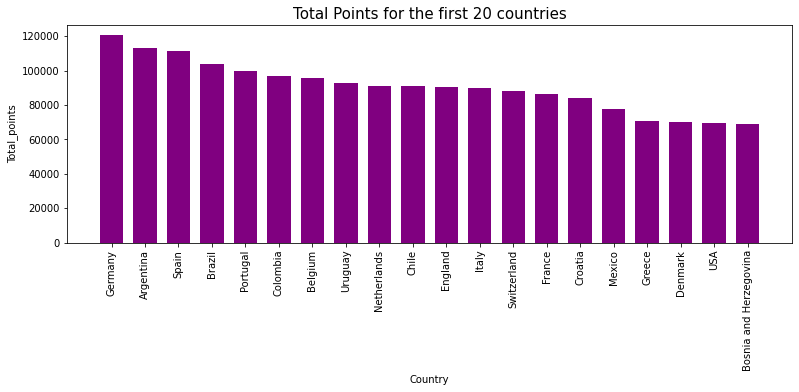

In [314]:
# Plotting the total points per country
Grouped_df=fifa_ranking['total_points'].groupby(fifa_ranking['country_full']).sum()
Grouped_df
Country_df=pd.DataFrame(Grouped_df).reset_index()
X=Country_df.sort_values(by='total_points',ascending=False).head(20)
# Plotting the order of points for the first 20 Countries
plt.figure(figsize=(13,4))
plt.bar(X['country_full'], X['total_points'], color ='purple',width = 0.7) 
plt.xlabel("Country")
plt.ylabel("Total_points")
plt.title("Total Points for the first 20 countries",fontsize=(15))
plt.xticks(rotation=90)
plt.show()
# Germany took the lead in the number of points followed closely by Argentina and Brazil

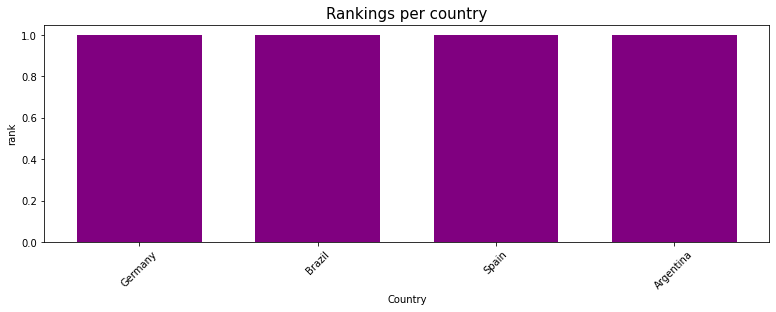

In [315]:
# The relationship between the countries and ranks
Y=fifa_ranking.sort_values(by='rank',ascending=True).head(30)
# Plotting the order of points for the first 20 Countries
plt.figure(figsize=(13,4))
plt.bar(Y['country_full'], Y['rank'], color ='purple',width = 0.7) 
plt.xlabel("Country")
plt.ylabel("rank")
plt.title("Rankings per country",fontsize=(15))
plt.xticks(rotation=45)
plt.show()

#### 2. Results dataset

In [316]:
results_df1.head()

,date,home_team,away_team,home_score,away_score,tournament,country
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,England
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,England
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland


#### Correlation

In [317]:
Corr_result=results_df1.corr()
Corr_result
# They are negatively yet weakly correlated. 
# They are independent of each other ie, the home score is weakly correlated to the away score.No relationship present.

,home_score,away_score
home_score,1.00000,-0.13341
away_score,-0.13341,1.00000


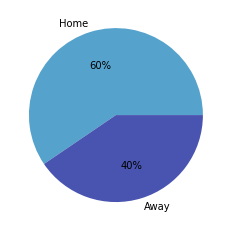

In [318]:
home_score=results_df1['home_score'].mean()
away_score=results_df1['away_score'].mean()
# Constructing pie chart to see the distribution of scores.
# define Seaborn color palette to use
data = [home_score,away_score]
labels = ['Home', 'Away']

#define Seaborn color palette to use
colors = sns.color_palette('icefire')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
# Home scores were greater than away scores

### c.) Multivariate analysis 

#### Merging my dataset to prepare it for analysis

In [319]:
merged_df=pd.merge(fifa_ranking,results_df1,left_index=True,right_index=True)
merged_df

,rank,country_full,country_abrv,total_points,rank_date,date,home_team,away_team,home_score,away_score,tournament,country
0,1,Germany,GER,0.00,1993-08-08,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,2,Italy,ITA,0.00,1993-08-08,1873-03-08,England,Scotland,4,2,Friendly,England
2,3,Switzerland,SUI,0.00,1993-08-08,1874-03-07,Scotland,England,2,1,Friendly,Scotland
3,4,Sweden,SWE,0.00,1993-08-08,1875-03-06,England,Scotland,2,2,Friendly,England
4,5,Argentina,ARG,0.00,1993-08-08,1876-03-04,Scotland,England,3,0,Friendly,Scotland
...,...,...,...,...,...,...,...,...,...,...,...,...
40834,42,IR Iran,IRN,625.73,2011-10-19,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa
40835,44,Nigeria,NGA,624.77,2011-10-19,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa
40836,45,Wales,WAL,618.79,2011-10-19,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt
40837,46,Armenia,ARM,607.91,2011-10-19,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India


In [320]:
# Rechecking the shape  of the dataset
print('The Merged dataset has: ',merged_df.shape[0],'Rows and ',merged_df.shape[1],'Columns')

The Merged dataset has:  40837 Rows and  12 Columns


In [321]:
merged_df.isnull().any()

rank            False
country_full    False
country_abrv    False
total_points    False
rank_date       False
date            False
home_team       False
away_team       False
home_score      False
away_score      False
tournament      False
country         False
dtype: bool

In [322]:
# Searching for duplicates
merged_df.duplicated().any().sum()
merged_df.drop_duplicates(inplace=True)
merged_df.duplicated().sum()

0

In [323]:
# Dropping unnecessary columns 
merged_clean1=merged_df.drop(columns=['country_abrv','total_points'])
merged_clean1.head()

,rank,country_full,rank_date,date,home_team,away_team,home_score,away_score,tournament,country
0,1,Germany,1993-08-08,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,2,Italy,1993-08-08,1873-03-08,England,Scotland,4,2,Friendly,England
2,3,Switzerland,1993-08-08,1874-03-07,Scotland,England,2,1,Friendly,Scotland
3,4,Sweden,1993-08-08,1875-03-06,England,Scotland,2,2,Friendly,England
4,5,Argentina,1993-08-08,1876-03-04,Scotland,England,3,0,Friendly,Scotland


In [324]:
# Exporting to csv to reenter the ranks and status columns
merged_clean1.to_csv('Merged.csv')


#### Feature Engingeering

In [325]:
# Loading the modified dataset with the home winning status
merged_mod=pd.read_csv('Merged_status.csv').drop(columns=['Unnamed: 0'],axis=1)
merged_mod.head()
# 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,rank,country_full,rank_date,date,home_team,away_team,home_score,away_score,tournament,country,home_status
0,1.0,Germany,08-08-93,1872-11-30,Scotland,England,0.0,0.0,Friendly,Scotland,D
1,2.0,Italy,08-08-93,1873-03-08,England,Scotland,4.0,2.0,Friendly,England,W
2,3.0,Switzerland,08-08-93,1874-03-07,Scotland,England,2.0,1.0,Friendly,Scotland,W
3,4.0,Sweden,08-08-93,1875-03-06,England,Scotland,2.0,2.0,Friendly,England,D
4,5.0,Argentina,08-08-93,1876-03-04,Scotland,England,3.0,0.0,Friendly,Scotland,W


In [326]:
# Rechecking missing values
merged_mod.isnull().any()
percent_missing = merged_mod.isnull().sum() * 100 / len(merged_mod)
percent_missing
# This is due to introduction of the date time columns rendering most columns null.

rank            96.105476
country_full    96.105476
rank_date       96.105476
date            96.105476
home_team       96.105476
away_team       96.105476
home_score      96.105476
away_score      96.105476
tournament      96.105476
country         96.105476
home_status      0.000000
dtype: float64

In [327]:
# Dealing with missing values
merged_mod.dropna(inplace=True)
# This doesnt affect my dataset as rankings are different every year and intoductiion of ranking dates is what introduced null values

In [328]:
percent_missing = merged_mod.isnull().sum() * 100 / len(merged_mod)
percent_missing

rank            0.0
country_full    0.0
rank_date       0.0
date            0.0
home_team       0.0
away_team       0.0
home_score      0.0
away_score      0.0
tournament      0.0
country         0.0
home_status     0.0
dtype: float64

In [329]:
merged_mod.head()
# With rank date ill know the exact rank a team is in.
df_ranks=pd.DataFrame(data=merged_mod,columns=['country_full','rank','rank_year'])
df_ranks.head()

,country_full,rank,rank_year
0,Germany,1.0,NaN
1,Italy,2.0,NaN
2,Switzerland,3.0,NaN
3,Sweden,4.0,NaN
4,Argentina,5.0,NaN


In [330]:
# Getting the year of the match
merged_mod['match_year'] = pd.DatetimeIndex(merged_mod['date']).year
merged_mod.shape

(40837, 12)

In [331]:
# Getting the ranking year..
merged_mod['rank_year'] = pd.DatetimeIndex(merged_mod['rank_date']).year

In [332]:
dropped_merged_mod=merged_mod.drop(columns=['rank_date','date'])

In [333]:
dropped_merged_mod['rank'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 148., 149., 150., 151., 15

In [334]:
dropped_merged_mod.head()

,rank,country_full,home_team,away_team,home_score,away_score,tournament,country,home_status,match_year,rank_year
0,1.0,Germany,Scotland,England,0.0,0.0,Friendly,Scotland,D,1872,1993
1,2.0,Italy,England,Scotland,4.0,2.0,Friendly,England,W,1873,1993
2,3.0,Switzerland,Scotland,England,2.0,1.0,Friendly,Scotland,W,1874,1993
3,4.0,Sweden,England,Scotland,2.0,2.0,Friendly,England,D,1875,1993
4,5.0,Argentina,Scotland,England,3.0,0.0,Friendly,Scotland,W,1876,1993


#### Getting the rankings for the home team per ranking year

In [335]:
rankings=dropped_merged_mod.set_index('country_full')[['rank','rank_year']].drop_duplicates().reset_index()
rankings

,country_full,rank,rank_year
0,Germany,1.0,1993
1,Italy,2.0,1993
2,Switzerland,3.0,1993
3,Sweden,4.0,1993
4,Argentina,5.0,1993
...,...,...,...
3739,Mauritania,180.0,2011
3740,Mauritius,189.0,2011
3741,Cook Islands,190.0,2011
3742,Bahamas,196.0,2011


## 7. Implementing the solution

#### 1.) Predicting the results of a game between two teams based on whose home and whose away

### a.) Modeling

#### 1. Polynomial Approach: Predicting goals that a home team scores and goals away team scores

In [336]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Converting tournament category to numerical to use it for my analysis
le = LabelEncoder()
le.fit(dropped_merged_mod['tournament'])
dropped_merged_mod['tournament']=le.transform(dropped_merged_mod['tournament'])
dropped_merged_mod 
# Converting home status to numerical for prediction
le = LabelEncoder()
le.fit(dropped_merged_mod['home_status'])
dropped_merged_mod['home_status']=le.transform(dropped_merged_mod['home_status'])
dropped_merged_mod
# Converting home team to numerical for prediction
# What is the outcome of the game depending on home and away status
# Preparing my data for  
le = LabelEncoder()
le.fit(dropped_merged_mod['home_team'])
dropped_merged_mod['home_team']=le.transform(dropped_merged_mod['home_team'])
dropped_merged_mod
# Conerting away team to categorical to perform anaysis
le = LabelEncoder()
le.fit(dropped_merged_mod['away_team'])
dropped_merged_mod['away_team']=le.transform(dropped_merged_mod['away_team'])
dropped_merged_mod
# # Preparing my data for training and testing
# X=dropped_merged_mod[['home_team','away_team']]
# Y=dropped_merged_mod['home_status']

,rank,country_full,home_team,away_team,home_score,away_score,tournament,country,home_status,match_year,rank_year
0,1.0,Germany,238,85,0.0,0.0,54,Scotland,0,1872,1993
1,2.0,Italy,85,233,4.0,2.0,54,England,2,1873,1993
2,3.0,Switzerland,238,85,2.0,1.0,54,Scotland,2,1874,1993
3,4.0,Sweden,85,233,2.0,2.0,54,England,0,1875,1993
4,5.0,Argentina,238,85,3.0,0.0,54,Scotland,2,1876,1993
...,...,...,...,...,...,...,...,...,...,...,...
40832,42.0,IR Iran,5,262,8.0,1.0,83,Samoa,2,2019,2011
40833,44.0,Nigeria,94,243,4.0,4.0,83,Samoa,0,2019,2011
40834,45.0,Wales,239,4,0.0,1.0,7,Egypt,1,2019,2011
40835,46.0,Armenia,268,189,0.0,1.0,61,India,1,2019,2011


#### Multicorlinearity test.

In [337]:
# Checking for corelation
dropped_merged_mod.corr()

,rank,home_team,away_team,home_score,away_score,tournament,home_status,match_year,rank_year
rank,1.000000,0.007200,-0.006470,-0.006563,-0.013738,-0.011431,-0.003496,-0.035824,0.071990
home_team,0.007200,1.000000,-0.008262,0.005188,-0.019527,-0.013878,0.001873,-0.021833,0.030796
away_team,-0.006470,-0.008262,1.000000,-0.014916,0.024609,-0.011648,-0.008013,-0.002336,-0.042073
home_score,-0.006563,0.005188,-0.014916,1.000000,-0.133400,0.003415,0.510870,0.075350,-0.103947
away_score,-0.013738,-0.019527,0.024609,-0.133400,1.000000,0.029273,-0.230260,0.092837,-0.105533
tournament,-0.011431,-0.013878,-0.011648,0.003415,0.029273,1.000000,-0.004510,0.018156,-0.036653
home_status,-0.003496,0.001873,-0.008013,0.510870,-0.230260,-0.004510,1.000000,0.023622,-0.025265
match_year,-0.035824,-0.021833,-0.002336,0.075350,0.092837,0.018156,0.023622,1.000000,-0.164362
rank_year,0.071990,0.030796,-0.042073,-0.103947,-0.105533,-0.036653,-0.025265,-0.164362,1.000000


#### Variance Inflation Factor

In [339]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X1 = dropped_merged_mod[['rank','home_score','away_score','tournament']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]
  
print(vif_data)
# The variance inflation factor is fair enough and indicates no major multicorlinearity within the dataset

      feature       VIF
0        rank  2.815095
1  home_score  1.793692
2  away_score  1.600649
3  tournament  3.222783


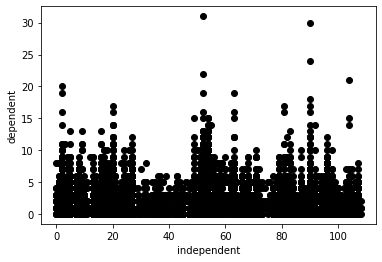

In [340]:
# # Preparing my data for training and testing
X=dropped_merged_mod['tournament'].values
Y=dropped_merged_mod['home_score'].values
# Plotting their relationship to see the model to use
plt.scatter(X, Y, color='black')
plt.ylabel('dependent')
plt.xlabel('independent')
plt.show()
# This model can not be trained using a Polynomial regression because of the discreteness of the values.

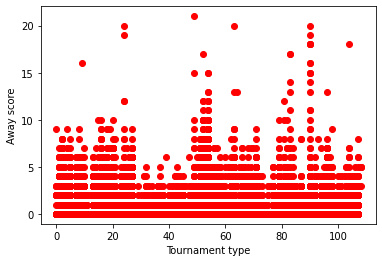

In [367]:
# # Preparing my data for training and testing
X=dropped_merged_mod['tournament'].values
Y=dropped_merged_mod['away_score'].values
# Plotting their relationship to see the model to use
plt.scatter(X, Y, color='red')
plt.ylabel('Away score')
plt.xlabel('Tournament type')
plt.show()
# This model can not be trained using a Polynomial regression because of the discreteness of the values.

#### 2. Logistic approach to determine the outcome of the games based on tournament type

In [342]:
X=dropped_merged_mod['tournament'].values.reshape(-1,1)
Y=dropped_merged_mod['home_status'].values.reshape(-1,1)
# Importing all the necessary libraries to train my model
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
# # Using Kfolds to split into training and testing
my_folds=StratifiedKFold(n_splits=5,random_state=0)
RMSE=[]
Count=0
for train_index,test_index in my_folds.split(X,Y):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  # fitting and trainig my model
  logreg = LogisticRegression()
  logreg.fit(X_train, Y_train)
  # This is our prediction for admission based on our model
  status_predict = logreg.predict(X_test)
  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

### b) Evaluation of the model

In [354]:
# Getting the confusion matrix to evaluate values predicted correctly and wrongly
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, status_predict)
print(cm)
# Getting the accuracy score of my model
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y_test, status_predict)
print("My model was ",ac,'% accurate')
# My model performed poorly with an accuracy score of 48%.

[[   0    0 1886]
 [   0    0 2309]
 [   0    0 3972]]
My model was  0.4863474960205706 % accurate


#### Model 2: Predicting home scores based on tournament type

In [349]:
X1=dropped_merged_mod['tournament'].values.reshape(-1,1)
Y1=dropped_merged_mod['home_score'].values.reshape(-1,1)
# Importing all the necessary libraries to train my model
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
# # Using Kfolds to split into training and testing
kfolds=KFold(n_splits=5,random_state=0)
RMSE=[]
Count=0
for train_index,test_index in my_folds.split(X,Y):
  X1_train, X1_test = X1[train_index], X1[test_index]
  Y1_train, Y1_test = Y1[train_index], Y1[test_index]
  # fitting and trainig my model
  logreg = LinearRegression()
  logreg.fit(X1_train, Y1_train)
  # This is our prediction for admission based on our model
  score_predict = logreg.predict(X1_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [351]:
# Evaluating the model
from sklearn import metrics
print('The RMSE for model 2 is:',np.sqrt(metrics.mean_squared_error(Y1_test,score_predict)))

The RMSE for model 1 is: 1.6141062587207582


#### predicting away scores based on tournament type

In [356]:
X2=dropped_merged_mod['tournament'].values.reshape(-1,1)
Y2=dropped_merged_mod['away_score'].values.reshape(-1,1)
# Importing all the necessary libraries to train my model
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
# # Using Kfolds to split into training and testing
kfolds=KFold(n_splits=5,random_state=0)
RMSE=[]
Count=0
for train_index,test_index in my_folds.split(X,Y):
  X2_train, X2_test = X2[train_index], X2[test_index]
  Y2_train, Y2_test = Y2[train_index], Y2[test_index]
  # fitting and trainig my model
  logreg = LinearRegression()
  logreg.fit(X2_train, Y2_train)
  # This is our prediction for admission based on our model
  away_score_predict = logreg.predict(X2_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [357]:
# Evaluating the model
from sklearn import metrics
print('The RMSE for model 3 is:',np.sqrt(metrics.mean_squared_error(Y2_test,away_score_predict)))

The RMSE for model 3 is: 1.3915477477588587


## 9. Follow up questions

#### What was the extent of variablility within my independent variables

#### Residual Plots and Heteroscedasticity

### a.) Did we have the right data?

More data was needed for analysis, especially data with current ranking per team ie away and home

### c.) Do we need other data to answer our question?

Yes, the data present had a lot of classes which may have attributed to incorrect prediction

### d.) Did we have the right question?

More questions about the nature of ranking per home team and away should be available.

### e.) What needs to be reavaluated?

The data collection process to enable up to date data and more details about the teams should be collected to ensure correct prediction.
The data we had was insuffcient for correct prediction